In [2]:
%matplotlib inline 

from __future__ import print_function
# these imports let you use opencv
import cv2          # opencv itself
import numpy as np  # matrix manipulations
from matplotlib import pyplot as plt           # this lets you draw inline pictures in the notebooks
import pylab                                   # this allows you to control figure size 
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook

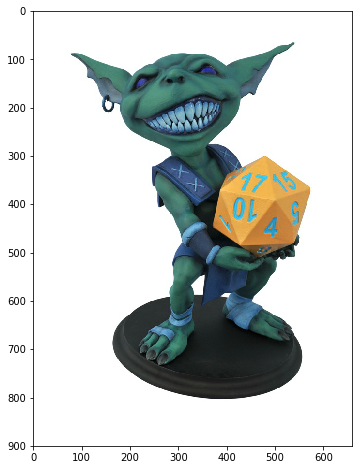

In [3]:
img = cv2.imread('dnd.jpg')

fig = plt.figure().add_subplot(1,1,1)
fig.imshow(img)

# this sort of works
# r = cv2.selectROI(fig, img, False)
# print(r)

# Selective Search

https://www.learnopencv.com/selective-search-for-object-detection-cpp-python/

Total Number of Region Proposals: 167


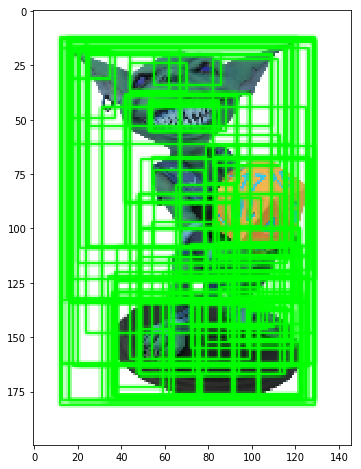

In [4]:
# speed-up using multithreads
cv2.setUseOptimized(True);
cv2.setNumThreads(4);

# read image
im = img
# resize image
newHeight = 200
newWidth = int(im.shape[1]*200/im.shape[0])
im = cv2.resize(im, (newWidth, newHeight))    

# create Selective Search Segmentation Object using default parameters
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

# set input image on which we will run segmentation
ss.setBaseImage(im)

# Switch to fast but low recall Selective Search method
ss.switchToSelectiveSearchFast()

# Switch to high recall but slow Selective Search method
# ss.switchToSelectiveSearchQuality()


# run selective search segmentation on input image
rects = ss.process()
print('Total Number of Region Proposals: {}'.format(len(rects)))

# number of region proposals to show
numShowRects = 100
# increment to increase/decrease total number
# of reason proposals to be shown
increment = 50

# create a copy of original image
imOut = im.copy()

# itereate over all the region proposals
for i, rect in enumerate(rects):
    # draw rectangle for region proposal till numShowRects
    if (i < numShowRects):
        x, y, w, h = rect
        cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
    else:
        break

# show output
plt.imshow(imOut);

        

(0.0, 15.0, 0.0, 15.0)

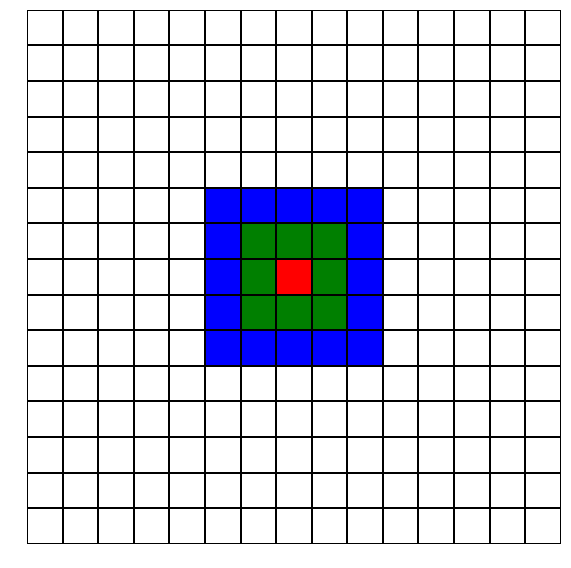

In [6]:
import matplotlib

N = 15
# make an empty data set
data = np.ones((N, N)) * np.nan
# fill in some fake data
for j in range(3)[::-1]:
    data[N//2 - j : N//2 + j +1, N//2 - j : N//2 + j +1] = j
# make a figure + axes
fig, ax = plt.subplots(1, 1, tight_layout=True)
# make color map
my_cmap = matplotlib.colors.ListedColormap(['r', 'g', 'b'])
# set the 'bad' values (nan) to be white and transparent
my_cmap.set_bad(color='w', alpha=0)
# draw the grid
for x in range(N + 1):
    ax.axhline(x, lw=2, color='k', zorder=5)
    ax.axvline(x, lw=2, color='k', zorder=5)
# draw the boxes
ax.imshow(data, interpolation='none', cmap=my_cmap, extent=[0, N, 0, N], zorder=0)
# turn off the axis labels
ax.axis('off')

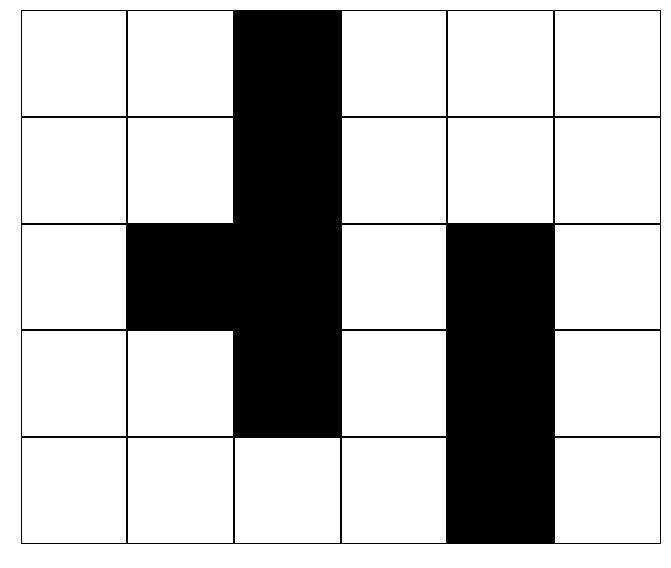

In [27]:
def drawMap(grid, path=None, cmap='binary'):
    rows = len(grid)
    cols = len(grid[0])
    # make an empty data set
#     data = np.ones((rows, cols)) * np.nan
    data = np.ones((rows, cols))
    
    for i, r in enumerate(grid):
        for j, c in enumerate(r):
            data[i,j] = 255 if c else 0
#             print(i,j,data[i,j])
    if path:
        for pt in path:
            y, x = pt
            data[y, x] = 127
    
    fig, ax = plt.subplots(1, 1, tight_layout=True)
    
    # make color map
    my_cmap = matplotlib.colors.ListedColormap(['r', 'g', 'b'])
    
    # set the 'bad' values (nan) to be white and transparent
    my_cmap.set_bad(color='w', alpha=0)
    
    # draw the grid
    for x in range(rows+1):
        ax.axhline(x, lw=2, color='k', zorder=rows)
        
    for x in range(cols+1):
        ax.axvline(x, lw=2, color='k', zorder=cols)
        
    # draw the boxes
#     ax.imshow(data, interpolation='none', cmap=my_cmap, extent=[0, N, 0, N], zorder=0)
    ax.imshow(data, interpolation='none', cmap=cmap, extent=[0, cols, 0, rows], zorder=0)
    
    # turn off the axis labels
    ax.axis('off')
    
grid = [[0, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [0, 1, 1, 0, 1, 0],
        [0, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 1, 0]
       ]

drawMap(grid)

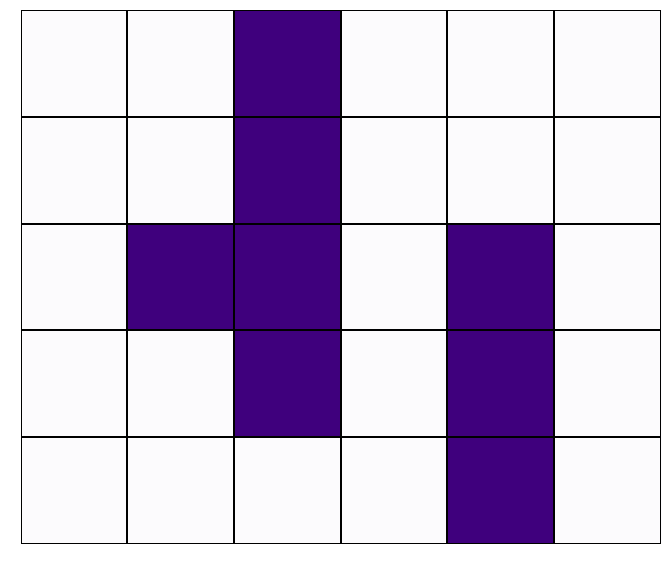

In [29]:

drawMap(grid, cmap='Purples')

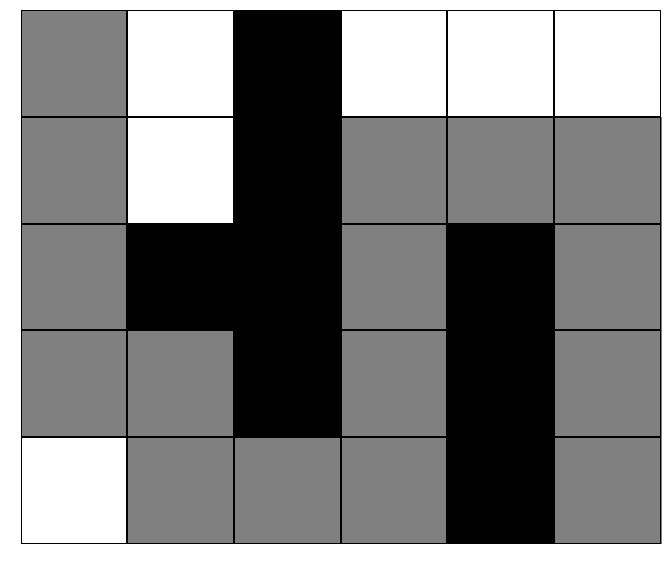

In [31]:
o = [[4, 5], [3, 5], [2, 5], [1, 5], [1, 4], [1, 3], [2, 3], [3, 3], [4, 3], [4, 2], [4, 1], [3, 1], [3, 0], [2, 0], [1, 0], [0, 0]]
drawMap(grid, o)

In [32]:
help(range)

Help on built-in function range in module __builtin__:

range(...)
    range(stop) -> list of integers
    range(start, stop[, step]) -> list of integers
    
    Return a list containing an arithmetic progression of integers.
    range(i, j) returns [i, i+1, i+2, ..., j-1]; start (!) defaults to 0.
    When step is given, it specifies the increment (or decrement).
    For example, range(4) returns [0, 1, 2, 3].  The end point is omitted!
    These are exactly the valid indices for a list of 4 elements.

